# 코드 실행해주세요

In [2]:
from hyperopt import STATUS_OK, fmin, tpe, Trials, hp
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = load_breast_cancer()

cancer_df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
cancer_df['target']= dataset.target
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

X_train, X_test, y_train, y_test=train_test_split(X_features, y_label, test_size=0.2, random_state=156 )

X_tr, X_val, y_tr, y_val= train_test_split(X_train, y_train, test_size=0.1, random_state=156 )

# 1번
베이지안 하이퍼파리미터 최적화하고 XGBoost 알고리즘 사용해보기

(1) 검색 공간 사용[5점]

<조건> hyperopt 사용해주세요
1. max_depth : 1 ~ 10 (step = 1)
2. learning_rate : 0.02 ~ 0.3 (step은 안씁니다.)

(2) 목적 함수 생성[10점]

<조건>
1. n_estimators : 300
2. 검색 공간 사용해서 하이퍼파라미터 넣어주기
3. binary classification에 적합한 eval_metric을 써주세요.
4. None값을 채워주시고, 채워주신 값에 대한 이유를 주석으로 적어주세요

In [ ]:
def objective_func(search_space):
  xgb_clf = pass # 적어주세요.

  accuracy = cross_val_score(xgb_clf, X_train, y_train, scoring='accuracy', cv=3) # 이거 남기기
  return {'loss': None * np.mean(accuracy), 'status': STATUS_OK} # 이거 남기기


(3) 베이지안 최적화 사용 [5점]

<조건>

1.fmin() 클래스를 이용해서 각 인자의 알맞은 값을 써주시고, 최적화된 learning_rate와 max_depth를 출력해주세요.

2. algo = tpe.suggest 사용해주세요.
3. seed값은 9로 설정해주세요.
4. 평가횟수는 100번으로 설정해주세요.

# (4) 산점도를 통한 그래프 이해 [10점]

max_depth와 learning_rate에 따른 loss(accuracy)값 변화 산점도로 살펴보기(matplotlib만 사용해주세요.)

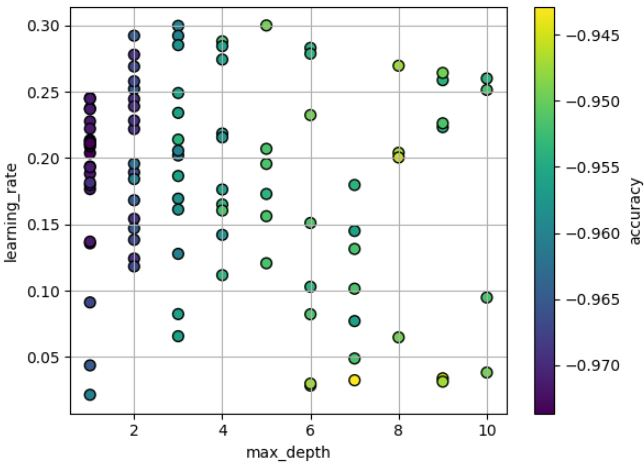

보기와 같은 그래프에 알맞게 코드 짜주시면 됩니다. 분포도는 다를 수 있습니다.(accuarcy에 -를 곱한 값이 더 정확한 그래프이지만, 감안하고 그래프 생성해주시면 됩니다.)

# (5) 최적의 하이퍼파리미터로 학습하기

<조건>
1. 위에서 찾은 최적의 하이퍼파라미터 값으로 설정해주세요.
2. eval_set는 훈련데이터와 검증 데이터로 설정해주세요.
3. 조기 중단은 10번으로 설정해주세요.
4. binary classification에 맞는 loss함수를 설정해주세요.


In [ ]:
xgb_wrapper = XGBClassifier(n_estimators = 300,
                            pass) # pass 부분 채워주세요.


xgb_wrapper.fit(pass) # pass 부분 채워주세요.

#(6)  학습 데이터 손실함수와 검증 데이터의 손실함수를 비교[20점]

<조건>
1.위의 산점도 그래프처럼 matplotlib으로만 그래프 그려주세요.

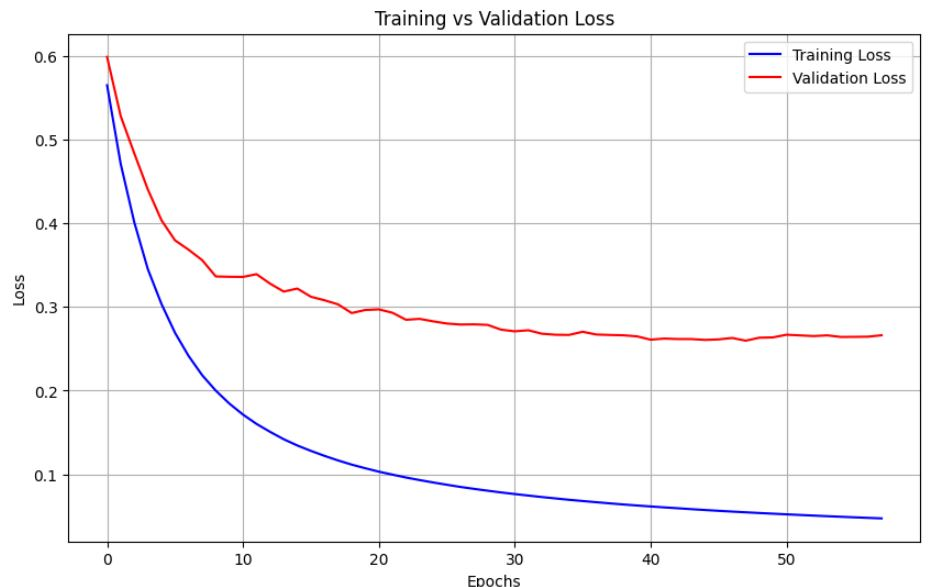

위와 같은 그래프로 코드 짜주시면 됩니다. (loss값은 다를 수 있으므로 그래프와 똑같이 출력이 안될 수 있습니다.)


# 2번

Stacking과 Voting

# 코드 실행해주세요.

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
import numpy as np

mnist = fetch_openml(name = 'mnist_784')

X_features, y_labels = mnist.data, mnist.target

#(1) MNIST 데이터 분할[5점]

<조건>

1.MNIST 데이터는 이미지 데이터로, 총 70000장입니다.
훈련 : 50,000장
검증 : 10,000장
테스트 : 10,000장
으로 각각 분할해주세요.

2. 훈련,검증,테스트 label데이터는 0.2 비율로 맞춰주세요.

# (2)로지스틱 회귀, k-최근접 이웃, 랜덤포레스트 인스턴스 생성해주세요.[5점]

<조건>
1. 하이퍼파리미터는 마음대로 설정해주세요.

# (3) 위에서 생성한 분류기로 voting방법을 사용해서 앙상블로 연결해보시고, 테스트 세트로 확인해보세요.
# 각 분류기와 비교해서 성능이 얼마나 향상되는지 주석으로 말씀해주세요. [15점]

<조건>
1. 각 분류기마다 정확도를 출력해주셔야합니다.
2. voting과 각 분류기마다 정확도를 비교해주세요.
3. 각 분류기와 비교해서 성능이 얼마나 향상되는지 주석으로 말씀해주세요.(코드로도 작성 가능합니다.)


# (4)문제의 각 분류기를 실행해서 검증 세트에서 예측을 만들고 그 결과로 새로운 훈련 세트를 만들어보세요. 각 훈련 샘플은 하나의 이미지에 대한 전체 분류기의 예측을 담은 벡터고 타깃은 이미지의 클래스입니다. 새로운 훈련 세트에 분류기 하나를 훈련시켜 보세요.[15점]


<조건>

1.RandomForest로 문제에서 주어질 것 입니다.

In [ ]:



rnd_forest_blender = RandomForestClassifier(n_estimators=200, oob_score=True, random_state=42)


# (5) 생성한 훈련세트로 rnd_forest_blender를 학습시켜주세요.[5점]


# (6) 이제 블렌더(메타 모델)을 훈련시켰으니, 테스트 세트에 앙상블을 평가해보고 정확도를 출력해주세요.[5점]



------

# 3번

## 1. 데이터 전처리 (10점)

In [ ]:
# Environment setting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
%matplotlib inline

(1) creditcard.csv 파일을 'card_df'라는 이름의 데이터프레임으로 읽어주세요 -1점

(2) card_df의 각 컬럼들에 대하여 결측치와 dtype을 확인해주세요 - 2점

(3) 본 실습의 목적은 주어진 컬럼들로 'Class (정상거래 or 사기거래)'를 예측하는 것입니다. 위 데이터의 'Class' 컬럼의 분포를 확인하고, 각 클래스가 어떤 거래를 의미하는지 적어주세요. - 2점

In [ ]:
# 'Class' 컬럼 분포 확인

답) 

(4) card_df에서 class 예측에 필요없는 컬럼인 'Time' 컬럼을 삭제해주세요. - 2점

(5) label 데이터와 feature 데이터로 나눈 후, 학습과 테스트 데이터로 분할해주세요. (단, test_size = 0.3,random_state=0, 클래스 0과 1의 분포가 학습 및 데스트 데이터에 동일하도록 분할) - 3점

## 2. 하이퍼 파라미터 튜닝(45점)

베이지안 최적화를 기반으로 하는 HyperOpt를 사용한 하이퍼 파라미터 튜닝은 다음의 단계를 거친다.<br>
1. 검색 공간 설정<br>
2. 목적 함수 설정<br>
3. 최적의 파라미터 추출<br>
4. 최적의 파라미터로 학습 및 평가<br><br>
위 순서로 과제를 진행해보자.

### 0. 다음의 코드를 실행해 주세요.

In [ ]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

lgbm_clf = LGBMClassifier(n_estimators=1000)

eval_set=[(X_tr, y_tr), (X_val, y_val)]
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=300, eval_metric="auc", eval_set=eval_set,verbose=False)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

위 코드를 통해 튜닝 전 ROC AUC가 0.8919임을 알 수 있다.(문제 1에서 확인했듯이 레이블의 분포가 불균형하므로 모든 평가 지표는 accuracy가 아닌 ROC AUC를 사용한다.)

### 1. 검색 공간을 설정해보자(10점).<br>
HyperOpt의 hp 모듈은 입력값의 검색 공간을 다양하게 설정할 수 있도록 여러 함수를 제공한다.(책 257쪽 참고)<br>
LightGBM의 경우 주로 num_leaves, max_depth, min_childe_samples를 통해 하이퍼 파라미터를 튜닝한다.<br>
< 과제 ><br>
a.num_leaves: 64부터 128까지 1의 간격을 가지고 설정<br>
b.max_depth: 128부터 256까지 1의 간격을 가지고 설정<br>
c.min_child_samples: 64부터 128까지 2의 간격을 가지고 설정<br>
d.learning_rate: 0.1부터 0.2까지 로그 변환된 값이 정규 분포 형태를 가지도록 설정

In [ ]:
from hyperopt import hp
lgbm_search_space = {'num_leaves': ,
                     'max_depth': ,
                     'min_child_samples': ,
                     'learning_rate':
                    }

### 2. 목적함수를 설정해보자(10점).<br>
탐색 시간을 줄이기 위해 목적함수의 모델에서는 n_estimator을 200으로 줄인다.<br>
< 과제 ><br>
a.n_estimator=200 <br>
b.roc_auc_list에 StratifiedKFold에서 나오는 ROC AUC 값을 저장, n_splits=3<br>
c.early_stopping_rounds=50<br>
d. 자료형 주의

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

def objective_func(search_space):
    lgbm_clf =  LGBMClassifier(n_estimators=?, num_leaves=?,
                               max_depth=?,
                               min_child_samples=?,
                               learning_rate=?)
    roc_auc_list = []
    skf = StratifiedKFold(?)

    for tr_index, val_index in skf.split(?):
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=?, eval_metric="auc", eval_set=[(X_tr, y_tr), (X_val, y_val)])

        score =  ?
        roc_auc_list.append(score)

    return ?

### 3. 최적의 파라미터를 추출해보자(10점).<br>
fmin()함수를 호출해보자. 이 함수는 목적 함수가 최소값을 가지는 파라미터를 딕셔너리 형태로 추출해준다.<br>
< 과제 ><br>
a.max_evals=50 <br>

In [ ]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

best = fmin(fn=?, space=?, algo=tpe.suggest,
            max_evals=?,
            trials=trials, rstate=np.random.default_rng(seed=30))

print('best:', best)

### 4. 최적의 파라미터로 학습 및 평가해보자(10점).<br>
learning rate를 낮추고 최적의 파라미터로 학습한 뒤 ROC AUC를 구해보자.<br>
< 과제 ><br>
a.n_estimators=1000, learning_rate=0.05 <br>
b.early_stopping_rounds=500 <br>

In [ ]:
lgbm_clf =  LGBMClassifier(n_estimators=?, num_leaves=?,
                           max_depth=?,
                           min_child_samples=?,
                           learning_rate=0.05
                          )

lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=?,
            eval_metric="auc",eval_set=[(X_tr, y_tr), (X_val, y_val)], verbose=False)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

ROC 값이 개선됨을 확인할 수 있다.

### 5. 피처드들의 중요도를 나타내보자(5점).<br>
subplot 함수와 plot_importance함수를 통해 피처의 중요도를 나타내보자.<br>
< 과제 ><br>
a.figsize=(10,8) <br>
b.max_num_features=20, height=0.4 <br>

In [ ]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(?)
plot_importance(?)

## 3. SMOTE 샘플링

데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#경로 수정은 자유롭게
card_df = pd.read_csv('/content/drive/MyDrive/creditcard 2.csv')
card_df.head(3)

성능평가 함수 생성

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

LGBM import 및 모델 학습/예측/평가 함수 생성

In [ ]:
# 인자로 사이킷런의 Estimator객체와, 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행.
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)


from lightgbm import LGBMClassifier

데이터 전처리(Time열 제거 및 로그변환)와 V17에 대한 이상치 제거 함수 생성


In [ ]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함.
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함.
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환.
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

outlier_index = get_outlier(df=card_df, column='V17', weight=1.5)

# get_processed_df( )를 로그 변환 후 V17 피처의 이상치 데이터를 삭제하는 로직으로 변경.
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    # 이상치 데이터 삭제하는 로직 추가
    outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy


Stratified 기반의 train_test_split 함수 생성

In [ ]:
from sklearn.model_selection import train_test_split

# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수.
def get_train_test_dataset(df=None):
    # 인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
    df_copy = get_preprocessed_df(df)
    # DataFrame의 맨 마지막 컬럼이 레이블, 나머지는 피처들
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    # train_test_split( )으로 학습과 테스트 데이터 분할. stratify=y_target으로 Stratified 기반 분할
    X_train, X_test, y_train, y_test = \
    train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    # 학습과 테스트 데이터 세트 반환
    return X_train, X_test, y_train, y_test


## 여기서부터 문제 시작

(6) get_train_test_dataset 함수를 사용해 데이터 전처리 및 데이터셋 분할을 진행해주세요. (5점)

In [ ]:
#get_train_test_dataset 함수를 실행하면 자동으로 get_preprocessed와 get_outlier 함수도 실행됨

(7) SMOTE 샘플링을 진행해주세요. (5점)

In [ ]:
#SMOTE를 사용해 X_trainrhk y_train을 각각 X_train_over, y_train_over로 변환

(8) LightGBM을 활용하여 학습/예측/평가를 진행해주세요. (5점)

In [ ]:
#get_model_train_eval 함수를 실행하면 자동으로 get_clf_eval 함수도 실행됨

# 4번

##  스태킹 앙상블

아래 코드를 실행시켜주세요.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
iris = load_iris()
iris_X = iris.data
iris_y = iris.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=0.2, random_state=11)

(1) 개별적인 학습 모델로 결정트리, KNN, lgbm을 사용할 것입니다.(하이퍼 파라미터는 자유롭게 사용해주세요.) 각각의 classifier를 생성해주고 학습 및 예측 시켜 주세요. (3점)

In [ ]:
#모델 생성


#학습


#예측


(2) 위에서 만든 예측 데이터를 열 형태로 병합하여 최종메타모델인 랜덤포레스트에 학습시켜 정확도를 출력해주세요.(7점)

In [ ]:
#병합


#최종메타모델 학습 및 예측


(3) cv세트 기반의 스태킹을 구현할 것입니다. 아래의 함수는 최종 메타 모델이 사용할 학습 및 테스트 데이터를 반환하는 함수인데 "none"에 알맞은 코드를 넣어주세요. (9점)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

def get_stacking_base_datasets(model, X_train, y_train, X_test, folds ):
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=0)
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')

    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n["none"]
        y_tr = y_train_n["none"]
        X_te = X_train_n["none"]

        model.fit("none" , "none")
        train_fold_pred[valid_index, :] = model.predict("none").reshape(-1,1)
        test_pred[:, folder_counter] = model.predict("none")


    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)

    return "none" , "none"

아래 코드를 실행시켜 주세요. (위에서 만든 함수를 각 모델에 적용하는 코드입니다)

In [ ]:
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 5)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test,  5)
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_wrapper, X_train, y_train, X_test, 5)

(4) 앞에서 만든 개별 모델의 예측데이터를 이용하여 최종 메타 모델의 학습, 테스트 데이터를 만들어주세요. (5점)

(5) 최종 메타 모델의 학습, 테스트 데이터를 이용해 학습 및 예측을 진행해주세요. (최종 메타 모델은 여전히 랜덤포레스트를 사용합니다.) (6점)